# Problem Statement 
I got this dataset from a friend from kaggle that contains DNA sequences of humans and their classes as a label. The task here is to create a multiclassifier model that predicts the class a given sequence with high accuracy.
<br>
Data Dictionary:
* sequence: the sequence nucleotides in  the DNA
* class: The gene family the DNA sequence belon to, in this dataset there are five classes <br>
    0:  G Protein coupled receptor <br>
    1:  Tyrosine kinase <br>
    2:  Tyrosine phosphatase <br>
    3:  Sythentase <br>
    4:  Synthase <br>
    5:  Ion channel <br>
    6:  Transcription factor 


In [99]:
#watering the ground
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
%matplotlib inline
sns.set(color_codes=True)
# Set maximum number of columns to be displayed

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

    

In [100]:
#importing the data
data = pd.read_table('human_data.txt')
data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [101]:
# accessing the data distribution
distribution =data['class'].value_counts()/ data['class'].count() * 100
distribution

6    30.662100
4    16.232877
3    15.342466
1    12.191781
0    12.123288
2     7.968037
5     5.479452
Name: class, dtype: float64

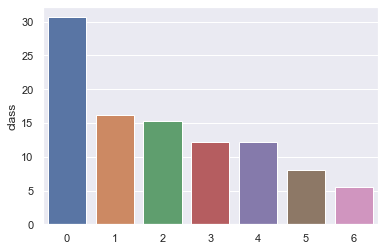

In [102]:
sns.barplot(y= distribution,  x =np.arange(0,7))

I loooove seaborn, just look at the beauty

Data is balanced as none is greater than 6-% of the other

So there are 7 for all the sequences 

## Data cleaning 
The only data cleaning that can be done with this dataset is to be sure that it only contains the four DNA nucleotides: ATCG

In [103]:
def checker(column):
    lst = ['A', 'T', 'C', 'G']
    error_index =[]
    for index, value in enumerate(list(column)) :
        for y in value:
            if y in lst:
                continue
            else:
                print('Sequence Error, Index is {}, Error is {}'.format(index, y))
                error_index.append(index)
    return error_index

In [104]:
error = checker(data['sequence'])

Sequence Error, Index is 34, Error is N
Sequence Error, Index is 44, Error is N
Sequence Error, Index is 46, Error is N
Sequence Error, Index is 46, Error is N
Sequence Error, Index is 54, Error is N
Sequence Error, Index is 59, Error is N
Sequence Error, Index is 60, Error is N
Sequence Error, Index is 102, Error is N
Sequence Error, Index is 102, Error is N
Sequence Error, Index is 103, Error is N
Sequence Error, Index is 103, Error is N
Sequence Error, Index is 125, Error is N
Sequence Error, Index is 125, Error is N
Sequence Error, Index is 130, Error is N
Sequence Error, Index is 130, Error is N
Sequence Error, Index is 158, Error is N
Sequence Error, Index is 171, Error is N
Sequence Error, Index is 171, Error is N
Sequence Error, Index is 172, Error is N
Sequence Error, Index is 173, Error is N
Sequence Error, Index is 173, Error is N
Sequence Error, Index is 195, Error is N
Sequence Error, Index is 195, Error is N
Sequence Error, Index is 211, Error is N
Sequence Error, Index i

In [105]:
error

[34,
 44,
 46,
 46,
 54,
 59,
 60,
 102,
 102,
 103,
 103,
 125,
 125,
 130,
 130,
 158,
 171,
 171,
 172,
 173,
 173,
 195,
 195,
 211,
 214,
 214,
 219,
 219,
 266,
 316,
 330,
 330,
 333,
 333,
 334,
 334,
 336,
 336,
 358,
 358,
 387,
 387,
 408,
 411,
 411,
 412,
 424,
 425,
 425,
 435,
 435,
 436,
 436,
 501,
 501,
 503,
 529,
 530,
 530,
 538,
 539,
 540,
 540,
 541,
 572,
 572,
 573,
 596,
 621,
 621,
 631,
 632,
 632,
 635,
 636,
 636,
 663,
 664,
 664,
 665,
 665,
 666,
 666,
 667,
 668,
 668,
 670,
 671,
 671,
 679,
 679,
 685,
 698,
 740,
 757,
 757,
 808,
 808,
 812,
 812,
 821,
 868,
 869,
 869,
 870,
 875,
 875,
 876,
 898,
 900,
 912,
 913,
 913,
 985,
 985,
 1053,
 1062,
 1119,
 1139,
 1139,
 1147,
 1147,
 1148,
 1156,
 1156,
 1158,
 1158,
 1179,
 1179,
 1185,
 1188,
 1188,
 1199,
 1199,
 1201,
 1202,
 1207,
 1207,
 1223,
 1245,
 1245,
 1246,
 1274,
 1274,
 1283,
 1298,
 1298,
 1305,
 1305,
 1307,
 1307,
 1312,
 1314,
 1319,
 1319,
 1350,
 1350,
 1351,
 1351,
 1352,
 1

In [106]:
data['sequence'][4359]

'NNTGCTGGTGGGCTGCAGCACAGGGTCACGGCAAAGACTGCACCAGATGTATTACGTACCAAGCCTGCCTTCATTGGGAAGACCAACTTGGATGGCATGATTACTGTGCAACTGCCTGAAGTACCTGCAAATGAGAATATAAAAGGTTACTACATAATAATTGTGCCTTTGAAGAAATCTCGCGGGAAATTTATCAAGCCATGGGAGAGTCCAGATGAAATGGAATTAGATGAGCTGCTTAAGGAGATATCTAGGAAGCGCAGAAGCATCCGTTATGGGAGAGAAGTTGAATTAAAGCCATATATTGCCGCTCACTTTGATGTCCTTCCCACTGAGTTCACCCTGGGGGATGACAAGCATTATGGTGGATTTACAAACAAGCAACTCCAAAGTGGTCAAGAATATGTCTTCTTTGTGTTAGCAGTAATGGAACATGCAGAGTCTAAGATGTATGCAACCAGCCCTTACTCCGACCCCGTGGTGTCAATGGATCTGGATCCGCAGCCAATCACGGATGAAGAAGAAGGCTTGATCTGGGTTGTAGGTCCTGTCCTTGCAGTGGTCTTTATCATCTGCATTGTCATTGCTATTCTTCTTTATAAAAGTAAACCCGACAGGAAGAGGGCAGAGTCCGACTCTAGAAAAAGCAGCATACCGAACAATAAGGAGATCCCTTCACACCACCCAACAGACCCTGTAGAACTGAGGCGCCTTAACTTTCAAACACCGGCTTTGAGCAGTAATTCAGTCCCCTACGCCTCCCTGATTGGCTCTGTGTCCTCCCTCTCTAGCCAAACCACCACTCAGTCCATATATGATAATAACTCTCTCCCACGATCCGCTCGAAAAGGTATGGCTAGCCATCCTCCAATACCCATCTTGGAACTTGCAGA'

So, here it is seen that this sequence contains 'N' which is not a nueclotide 

In [107]:
no_error = []
for x in data.iloc[error]['sequence']:
    #print(x,'\n')
    g =''
    for y in x:
        if y != 'N':
            g += y
    no_error.append(g)
data.loc[error,'sequence'] = no_error
    
error2 =checker(data['sequence'])

Hulala, no error generated since the list in the checker fxn is now empty.
Hulala again

In [108]:
data.iloc[error]['sequence']

34      GGCAAACAAGAGAGAAAGCAAAATTTTCAGATGGAGAAAAGTGCCG...
44      TGCAGGTGATTTTCAAAGCCAAGTCAAAATATTCTCCAGAATTACT...
46      GTTAAACCTCAGCATCGGCGGCCCGGACTTCATGGATCATCCGTTT...
46      GTTAAACCTCAGCATCGGCGGCCCGGACTTCATGGATCATCCGTTT...
54      GCCTCGCAGGCAGCACCAGCCTCATGCACAACCACGCGGCCCTCCC...
                              ...                        
4270    TGCAGCCGCCTACCTGCTCCAGGGAAGCTTCTATGGCCACTCCATC...
4311    CTATGGATTCTTCTGCAGTTTATGTGTTAAGTAGTATGGCTCGCCA...
4335                                          ACGCCTGGTGA
4359    TGCTGGTGGGCTGCAGCACAGGGTCACGGCAAAGACTGCACCAGAT...
4359    TGCTGGTGGGCTGCAGCACAGGGTCACGGCAAAGACTGCACCAGAT...
Name: sequence, Length: 530, dtype: object

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [110]:
class_0 = data[data['class'] ==0]

In [111]:
def analyzer(data, class_value, class_name):
    ''' This function give the nucleotide count and 
        visualisation of a class and a visualization.
    
    Attributes:
        mean (dataframe) the dataframe to subset from
        class_value (0 - 6) representing the class to be accessed
        class_name (string) representing the name of the class value
            
    '''
    dic = {}
    for row in  data[data['class'] == class_value]['sequence']:
        for keys in row:
            dic[keys] = dic.get(keys, 0) + 1
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
    print(dic)
    plt.figure(figsize=(8, 6), dpi=80)
    sns.barplot(list(dic.keys()), list(dic.values()))
    plt.title('Nucleotide count for' + ' ' +  class_name)
    plt.xlabel('Nucleotides')
    plt.ylabel('Count')

{'A': 196652, 'T': 203581, 'G': 205792, 'C': 223536}
{'T': 164836, 'A': 181489, 'C': 211535, 'G': 219718}
{'T': 146343, 'G': 158830, 'C': 160058, 'A': 177035}
{'T': 152384, 'C': 169764, 'A': 170697, 'G': 186412}
{'T': 138576, 'A': 150443, 'C': 162154, 'G': 172174}
{'T': 108260, 'C': 118130, 'G': 120063, 'A': 120161}
{'T': 308520, 'G': 390115, 'A': 405682, 'C': 411092}


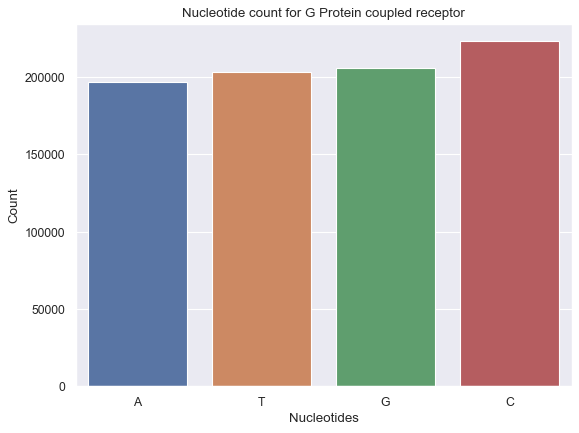

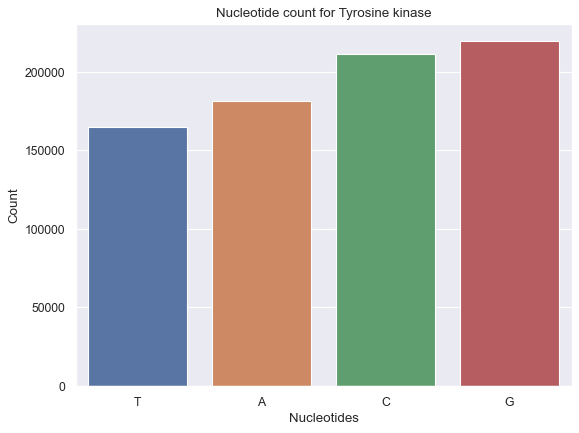

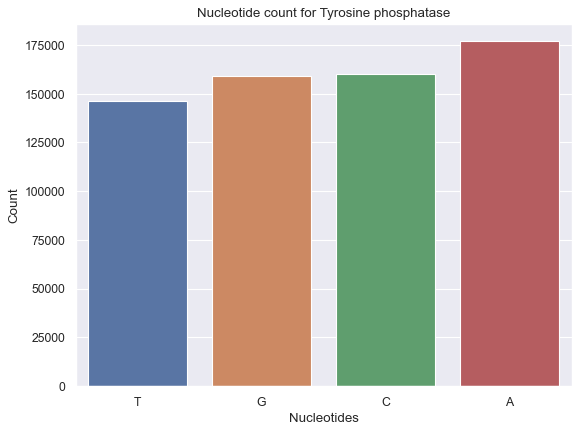

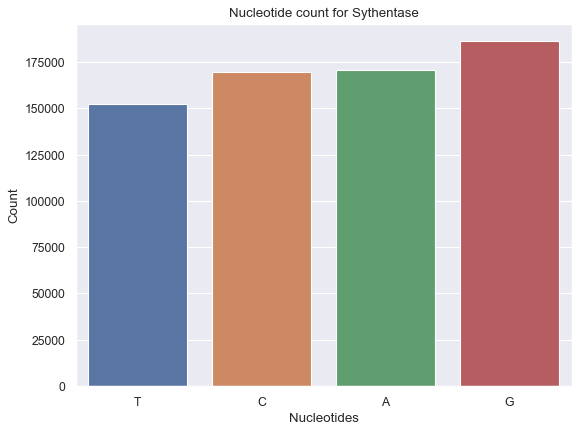

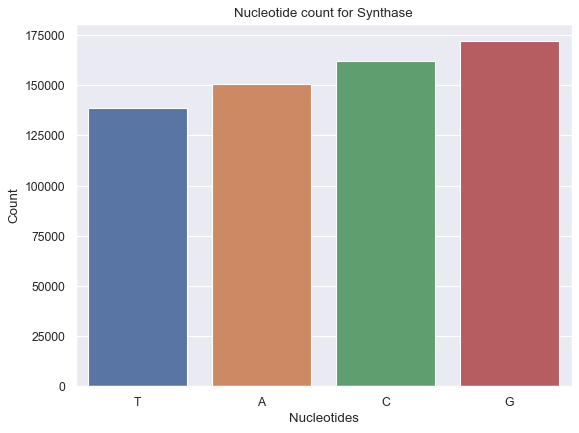

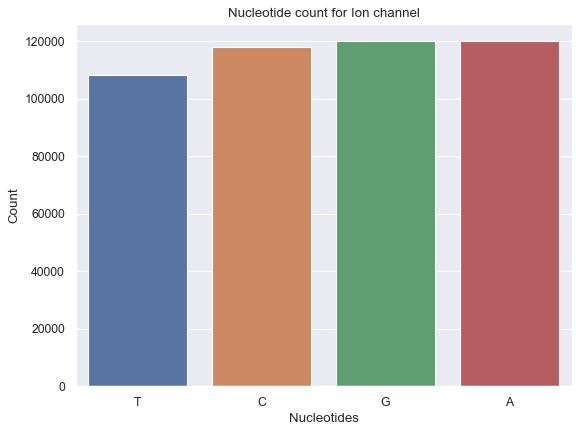

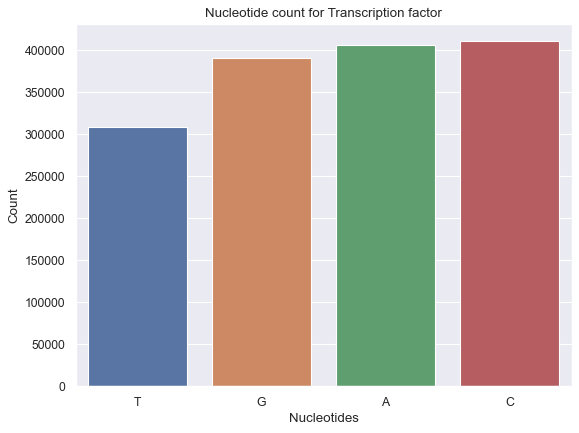

In [112]:
#checking the first class

analyzer(data, 0, 'G Protein coupled receptor')
analyzer(data, 1, 'Tyrosine kinase')
analyzer(data, 2, 'Tyrosine phosphatase')
analyzer(data, 3, 'Sythentase')
analyzer(data, 4, 'Synthase')
analyzer(data, 5, 'Ion channel')
analyzer(data, 6, 'Transcription factor')


## The classes follow themselves with this pattern
*ATGC
*TACG
*TGCA
*TCAG
*TCGA
*TGAC

### SO now my data is clean, I to transform the sequences from str to int and for this, I will be using  K-mer counting system
### K-mer  counting system converts sequences by breaking to short bits, this way, we than change the short sequences with n len to int, just like transcribing sequences to shorts and translating them to int

In [113]:
#creating a function that does the conversion using k = 6
def k_mer(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [114]:
# adding new column 'word' to the df with the k-mer'ed sequence
data['word'] = data.apply(lambda x: k_mer(x['sequence']), axis=1)
data.head()

,sequence,class,word
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [115]:
data.head()

,sequence,class,word
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [116]:
data.drop('sequence', axis =1, inplace = True)

Now converting the texts to word by joining all the words to form a sentence in order for it to be able make the squence become like a full sentence then I can apply bag of word.   

In [117]:
texts = list(data['word'])
for item in range(len(texts)):
    texts[item] = ' '.join(texts[item])
y_data = data.iloc[:, 0].values

In [118]:
texts[1]

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [218]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(texts)


In [219]:
print(X.shape)
print(y_data.shape)

(4380, 231928)
(4380,)


In [220]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)


In [227]:
#building the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.2)

In [228]:
#model fitting
model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [229]:
y_test.shape

(876,)

In [230]:
y_pred = model.predict(X_test)

In [250]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1   2    3    4   5    6
Actual                                    
0          100    0   0    0    1   0    1
1            0  104   0    0    0   0    2
2            0    0  78    0    0   0    0
3            0    0   0  124    1   0    0
4            1    0   0    0  145   0    3
5            0    0   0    0    0  51    0
6            1    0   0    1    0   0  263
accuracy = 0.987 
precision = 0.988 
recall = 0.987 
f1 = 0.987


# wow fullfilment... classifer made, project done
### You can contact me on twitter as @AbrahamOwos, look forward to hearing from you.